# Orthogonal Subspace Projection algorithms
We try to application OSP approach.

Prepared Data:

* MixtureA = sin + square

* MixtureB = sin + square + triangle

OSP input: 

* $U$ = [sin signal, squre signal]

* $D$ = [triangle signal]


In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy import signal
import random
import math

In [2]:
def preprocess(size):
    i = np.arange(0,1,1.0/size) * 2 * np.pi
    rawSignal = [[1+np.sin(t), 1+signal.square(t), signal.sawtooth(2*np.pi*t)] for t in i]
    
    mixture = [[None]*size,[None]*size]
    u, d = np.zeros([100,2], dtype=float), np.zeros([100,1], dtype=float)
    
    for i, (sin, square, triangle) in enumerate(rawSignal):
        mixture[0][i] = sin + square
        mixture[1][i] = sin + square + triangle
        u[i][0], u[i][1] = sin, square
        d[i][0] = triangle
    
    return u, d, np.array(mixture[0]), np.array(mixture[1])

In [3]:
class Solution(object):
    def osp_train(self, u):
        uT = np.transpose(u)
        uTu = uT.dot(u)
        uTu_inverce = inv(uTu)
        uTu_inverce_uT = uTu_inverce.dot(uT)
        id_matrix = np.identity(SAMPLE_POINTS)
        u_uTu_invers_uT = u.dot(uTu_inverce_uT)
        PuT = id_matrix-u_uTu_invers_uT
        return PuT
    def osp_test(self, PuT,d,x):
        """
        : PuT: the output of OSP during training
        : d  : the desire detected object 
        : x  : input from test case
        """
        PuTR=np.transpose(np.array([x.dot(PuT)])) # R the spectral (PuT*R)
        PuTR_TR=np.transpose(d) # transpose of D

        return PuTR_TR.dot(PuTR)[0][0]

In [4]:
class VisualizeTool(object):
    def subplot(self, x, title=None):
        size = -(-math.sqrt(len(x)) // 1)
        for i in range(len(x)):
            plt.subplot(size, size, i+1)
            plt.title(title[i])
            plt.plot(x[i])
        return 
    def plt_cuz(self,x,y,title=None):
        plt.figure()
        plt.plot(y)
        plt.ylabel('Scores')
        plt.title(title)
        xtick = ['B' if k else 'A' for k in x]
        plt.xticks(range(len(x)), xtick)
        return

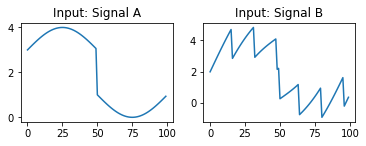

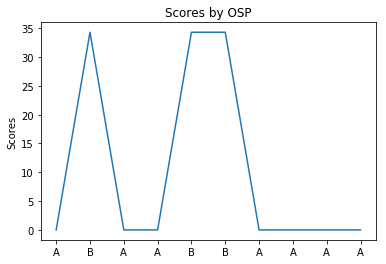

In [6]:
if __name__ == '__main__':
    # preprocess
    SAMPLE_POINTS = 100
    u, d, mixtureA, mixtureB = preprocess(size=SAMPLE_POINTS)
    
    # osp
    method = Solution()
    PuT = method.osp_train(u)
    
    # example
    testNum = 10
    data = [mixtureA, mixtureB]
    seed = [random.randint(0,1) for x in range(testNum)]
    
    testCase = [data[x] for x in seed]
    rst = [method.osp_test(PuT,d,x) for x in testCase]
    
    # visualize input
    display = VisualizeTool()
    display.subplot(x=[mixtureA, mixtureB], title=['Input: Signal A','Input: Signal B'])
    display.plt_cuz(x=seed,y=rst,title='Scores by OSP')

    